# Advanced Seaborn Visualizations
This notebook demonstrates advanced visualization techniques using Seaborn, including heatmaps, pair plots, clustered heatmaps, FacetGrid, and violin plots with swarm overlays. Each example uses built-in Seaborn datasets (Iris and Tips) for simplicity. Run each cell to see the output.

## Setup
First, import the required libraries and set the Seaborn style for better visuals.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set Seaborn style
sns.set_style("whitegrid")

In [3]:
import scipy
print(scipy.__version__)

1.16.1


## 1. Correlation Heatmap
A heatmap to visualize correlations in the Iris dataset.



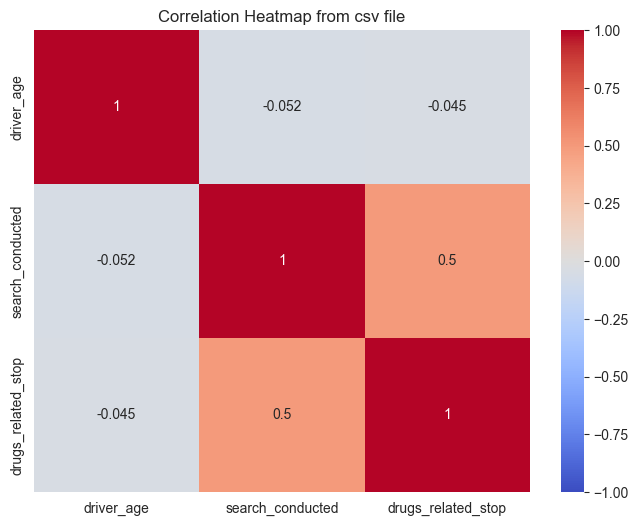

In [4]:
# Load the Iris dataset
# iris = sns.load_dataset("iris")
ri = pd.read_csv('police.csv')
# Calculate correlation matrix
# corr = ri.corr(numeric_only=True)


# # Select specific columns (replace with actual column names from police.csv)
selected_cols = ['driver_age', 'search_conducted', 'drugs_related_stop'] 
# Replace with actual numeric column names
ri_selected = ri[selected_cols]

# # Calculate correlation matrix
corr = ri_selected.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, center=0)
plt.title("Correlation Heatmap from csv file")
plt.show()

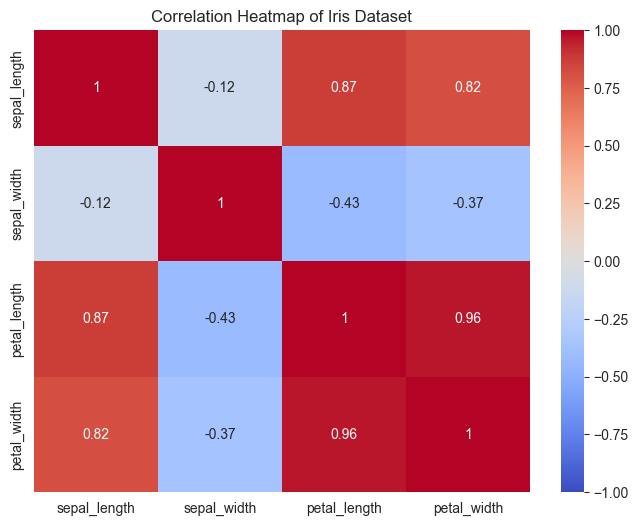

In [6]:
# Load the Iris dataset
iris = sns.load_dataset("iris")

# Calculate correlation matrix
corr = iris.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, center=0)
plt.title("Correlation Heatmap of Iris Dataset")
plt.show()

**Explanation**: 
- Computes the correlation matrix for numerical columns.
- Uses `sns.heatmap` with annotations and a diverging color scheme (`coolwarm`).
- The color scale is set to range from -1 to 1 for clarity.

## 2. Pair Plot
A pair plot to visualize pairwise relationships and distributions in the Iris dataset.

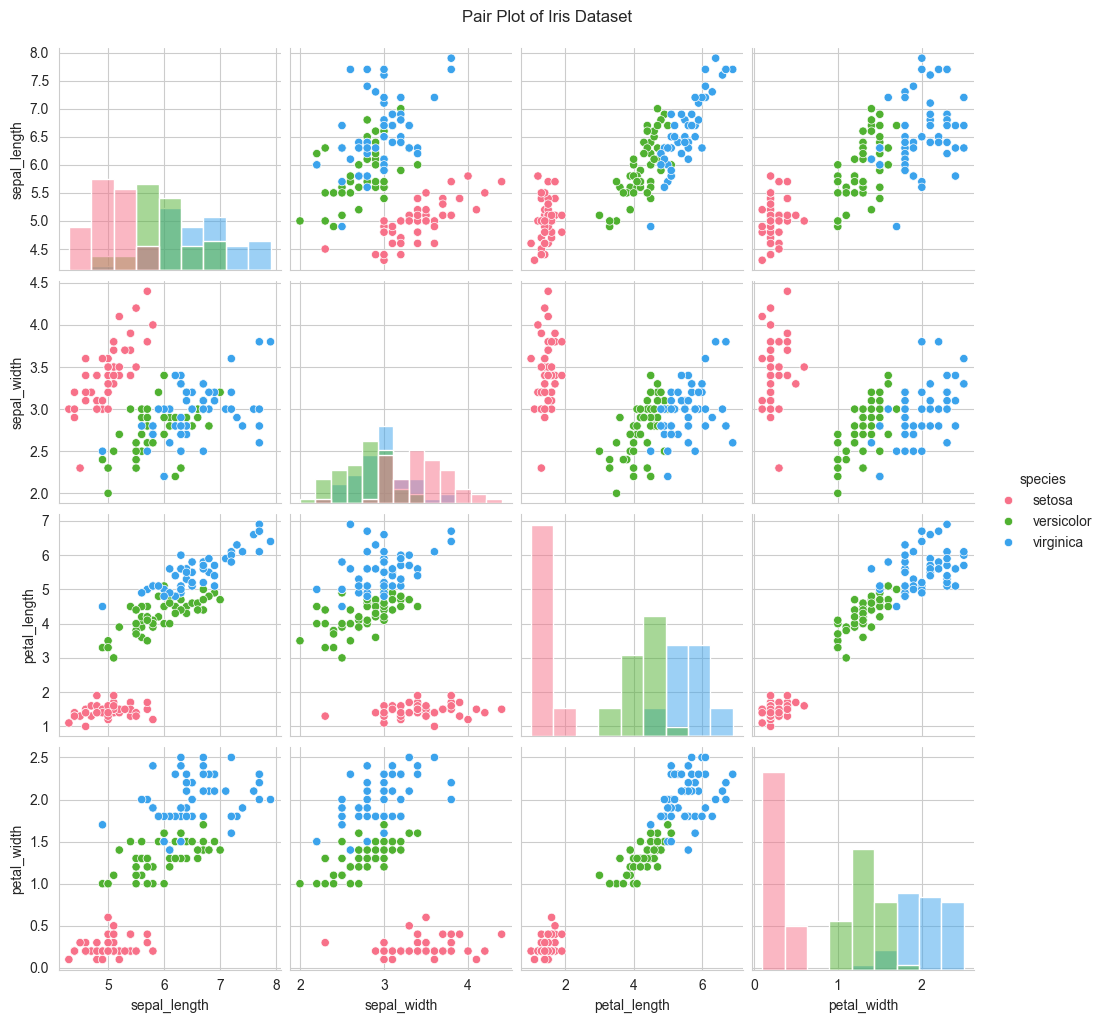

In [53]:
# Create a pair plot
sns.pairplot(iris, hue="species", diag_kind="hist", palette="husl")
# sns.pairplot(iris, hue="species", diag_kind="kde", palette="plasma")
plt.suptitle("Pair Plot of Iris Dataset", y=1.02)
plt.show()

**Explanation**:
- `sns.pairplot` creates scatter plots for each pair of variables and histograms on the diagonal.
- `hue="species"` colors points by species.
- `diag_kind="hist"` uses histograms for distributions (can use `kde` for smoother curves).

## 3. Clustered Heatmap
A clustered heatmap with hierarchical clustering on a random dataset.

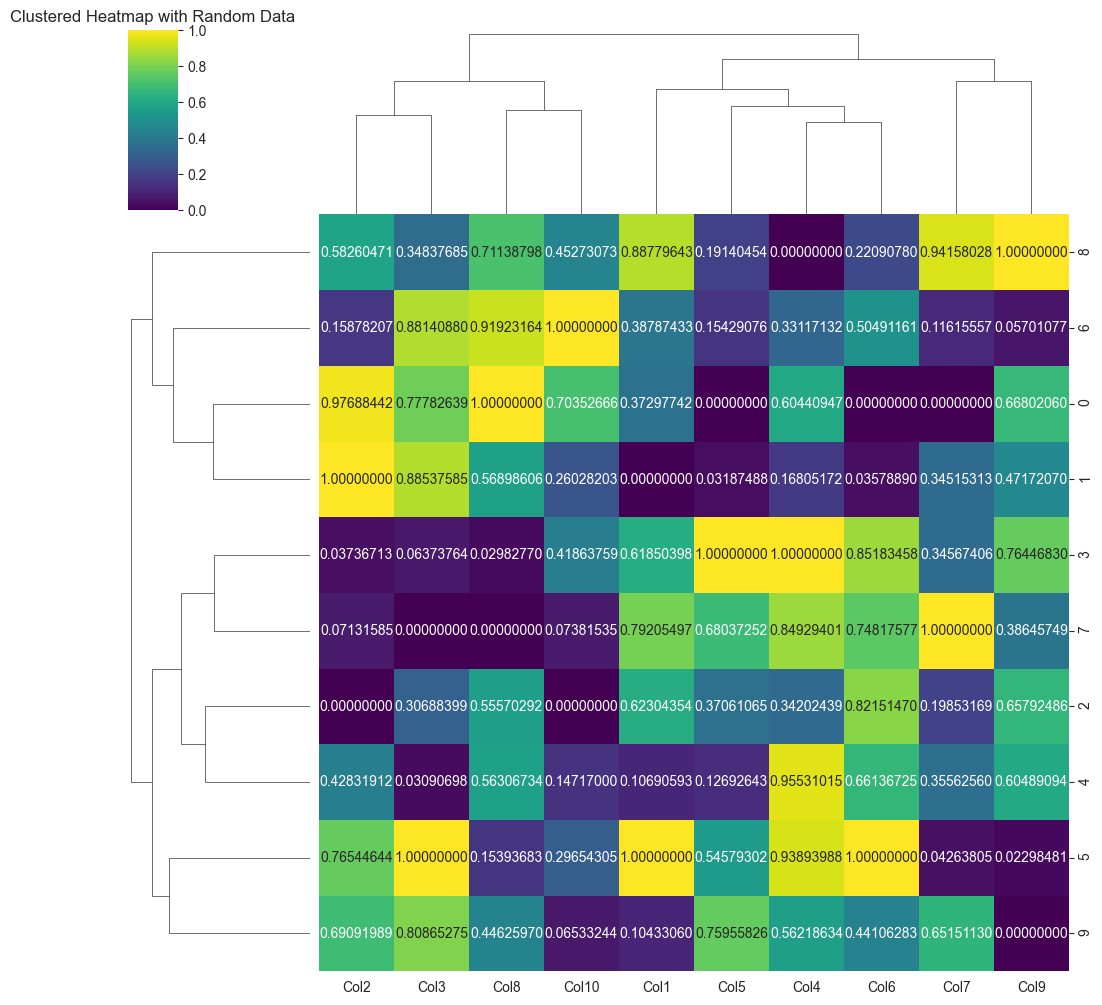

In [65]:
# Generate random data
np.random.seed(42)
data = np.random.rand(10, 10)
df = pd.DataFrame(data, columns=[f"Col{i}" for i in range(1, 11)])

# Create a clustered heatmap
sns.clustermap(df, cmap="viridis", standard_scale=1, annot=True, fmt=".8f")
plt.title("Clustered Heatmap with Random Data")
plt.show()

**Explanation**:
- Generates a 10x10 matrix of random values.
- `sns.clustermap` applies hierarchical clustering to rows and columns.
- `standard_scale=1` normalizes columns to [0, 1].
- Dendrograms show clustering structure.
- standard_scale=1: Standardizes columns (each column’s values are scaled to have mean = 0 and standard deviation = 1).
- standard_scale=0: Standardizes rows (each row’s values are scaled to have mean = 0 and standard deviation = 1).
- standard_scale=None (default): No standardization is applied; the raw data is used.

## 4. FacetGrid with Histograms
A FacetGrid to plot histograms of total bills from the Tips dataset, split by time and smoker status.

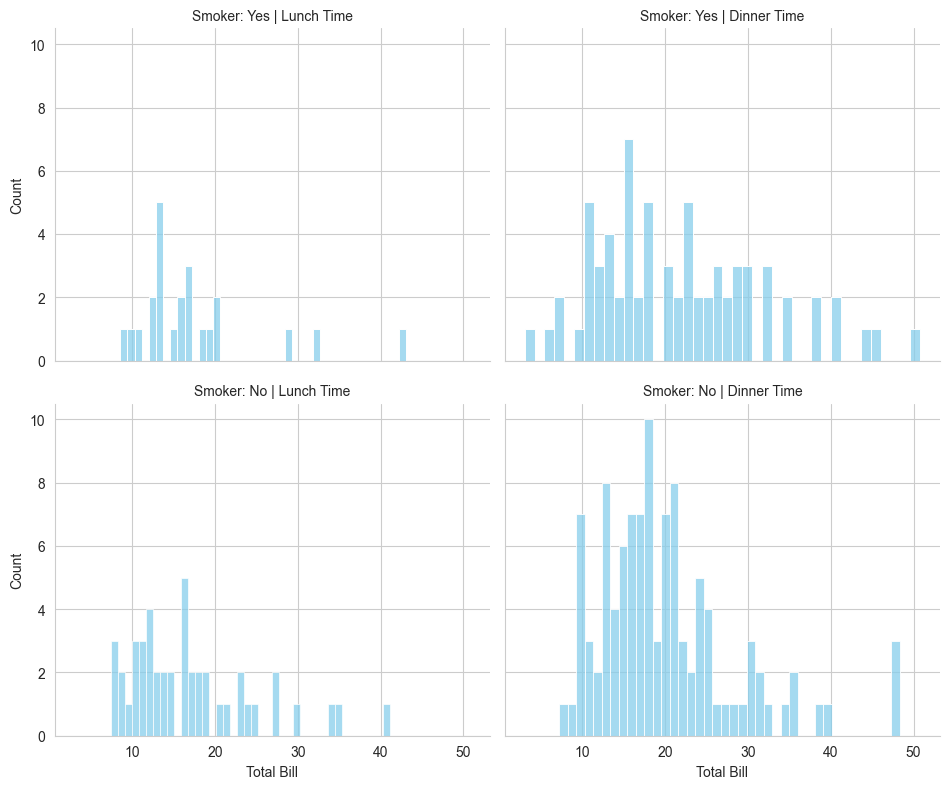

In [67]:
# Load Tips dataset
tips = sns.load_dataset("tips")

# Create a FacetGrid with histograms
g = sns.FacetGrid(tips, col="time", row="smoker", height=4, aspect=1.2)
g.map(sns.histplot, "total_bill", bins=40, color="skyblue")
g.set_titles(col_template="{col_name} Time", row_template="Smoker: {row_name}")
g.set_axis_labels("Total Bill", "Count")
plt.show()

**Explanation**:
- `sns.FacetGrid` creates a grid of subplots by `time` (columns) and `smoker` (rows).
- `g.map(sns.histplot, "total_bill")` applies histograms to each subplot.
- Custom titles and labels improve readability.

## 5. Violin Plot with Swarm Overlay
A violin plot with swarm plot overlay to show distributions and individual data points in the Tips dataset.

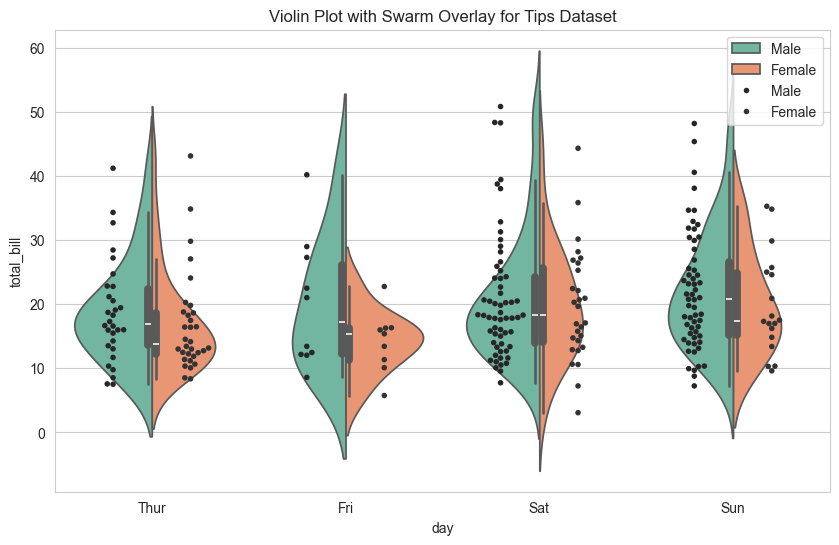

In [49]:
# Create a violin plot with swarm overlay
plt.figure(figsize=(10, 6))
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, palette="Set2", split=True)
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips, palette="dark:0.2", dodge=True, size=4)
plt.title("Violin Plot with Swarm Overlay for Tips Dataset")
plt.legend(loc="upper right")
plt.show()

**Explanation**:
- `sns.violinplot` shows the distribution of `total_bill` by `day`, split by `sex`.
- `split=True` combines male/female distributions in one violin.
- `sns.swarmplot` adds individual data points, with `dodge=True` to separate by `sex`.
- Darkened swarm points (`palette="dark:0.2"`) improve contrast.

## Notes
- Run each cell separately to display plots.
- Adjust `figsize`, `palette`, or other parameters for customization.
- Use `pd.read_csv()` to load your own datasets if needed.
- Ensure Seaborn, Matplotlib, NumPy, and Pandas are installed (`!pip install seaborn matplotlib numpy pandas`).